# Wikipedia Talk Data - Getting Started

This notebook gives an introduction to working with the various data sets in [Wikipedia
Talk](https://figshare.com/projects/Wikipedia_Talk/16731) project on Figshare. The release includes:

1. a large historical corpus of discussion comments on Wikipedia talk pages
2. a sample of over 100k comments with human labels for whether the comment contains a personal attack
3. a sample of over 100k comments with human labels for whether the comment has aggressive tone

Please refer to our [wiki](https://meta.wikimedia.org/wiki/Research:Detox/Data_Release) for documentation of the schema of each data set and our [research paper](https://arxiv.org/abs/1610.08914) for documentation on the data collection and modeling methodology. 

In this notebook we show how to build a simple classifier for detecting personal attacks and apply the classifier to a random sample of the comment corpus to see whether discussions on user pages have more personal attacks than discussion on article pages.

## Building a classifier for personal attacks
In this section we will train a simple bag-of-words classifier for personal attacks using the [Wikipedia Talk Labels: Personal Attacks]() data set.

In [13]:
import pandas as pd
import urllib
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [5]:
# download annotated comments and annotations

ANNOTATED_COMMENTS_URL = 'https://ndownloader.figshare.com/files/7554634' 
ANNOTATIONS_URL = 'https://ndownloader.figshare.com/files/7554637' 


def download_file(url, fname):
    urllib.request.urlretrieve(url, fname)

                
download_file(ANNOTATED_COMMENTS_URL, 'attack_annotated_comments.tsv')
download_file(ANNOTATIONS_URL, 'attack_annotations.tsv')

AttributeError: 'module' object has no attribute 'request'

In [4]:
# load data
path = '~/AI/final_project/data/'
comments = pd.read_csv(path + 'attack_annotated_comments.tsv', sep = '\t', index_col = 0)
annotations = pd.read_csv(path + 'attack_annotations.tsv',  sep = '\t')

In [5]:
len(annotations['rev_id'].unique())

115864

In [26]:
annotations

,rev_id,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack
0,37675,1362,0.0,0.0,0.0,0.0,0.0
1,37675,2408,0.0,0.0,0.0,0.0,0.0
2,37675,1493,0.0,0.0,0.0,0.0,0.0
3,37675,1439,0.0,0.0,0.0,0.0,0.0
4,37675,170,0.0,0.0,0.0,0.0,0.0
5,37675,176,0.0,0.0,0.0,0.0,0.0
6,37675,481,0.0,0.0,0.0,0.0,0.0
7,37675,487,0.0,0.0,0.0,0.0,0.0
8,37675,578,0.0,0.0,0.0,0.0,0.0
9,37675,1127,0.0,0.0,0.0,0.0,0.0


In [6]:
# labels a comment as an atack if the majority of annoatators did so
labels = annotations.groupby('rev_id')['attack'].mean() > 0.5

In [7]:
# join labels and comments
comments['attack'] = labels

In [36]:
meanattack = annotations.groupby('rev_id')['attack'].mean()
comments['attack_score'] = meanattack
pd.set_option('display.max_colwidth', -1)
comments.query('attack_score > 0.3')[['comment', 'attack_score']].head(100)

comment  \
rev_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [8]:
# remove newline and tab tokens
comments['comment'] = comments['comment'].apply(lambda x: x.replace("NEWLINE_TOKEN", " "))
comments['comment'] = comments['comment'].apply(lambda x: x.replace("TAB_TOKEN", " "))

In [9]:
comments.query('attack')['comment'].head()

rev_id
801279             Iraq is not good  ===  ===  USA is bad   
2702703      ____ fuck off you little asshole. If you wan...
4632658         i have a dick, its bigger than yours! hahaha
6545332      == renault ==  you sad little bpy for drivin...
6545351      == renault ==  you sad little bo for driving...
Name: comment, dtype: object

In [23]:
comments

,comment,year,logged_in,ns,sample,split,attack
rev_id,,,,,,,
37675,`- This is not ``creative``. Those are the di...,2002,False,article,random,train,False
44816,` :: the term ``standard model`` is itself le...,2002,False,article,random,train,False
49851,"True or false, the situation as of March 200...",2002,False,article,random,train,False
89320,"Next, maybe you could work on being less cond...",2002,True,article,random,dev,False
93890,This page will need disambiguation.,2002,True,article,random,train,False
102817,- Important note for all sysops: There is a ...,2002,True,user,random,train,False
103624,I removed the following: All names of early P...,2002,True,article,random,train,False
111032,`:If you ever claimed in a Judaic studies prog...,2002,True,article,random,dev,False
120283,"My apologies I'm English, I watch cricket,...",2002,True,article,random,dev,False


In [16]:
comments.query('attack')['logged_in'].value_counts()

False    7635
True     5955
Name: logged_in, dtype: int64

In [21]:
(7635.0/(7635.0+5955.0))*100

56.18101545253863

In [24]:
comments.query('attack')['year'].value_counts()

2008    2239
2006    1997
2007    1894
2009    1683
2010    1301
2011    1035
2012     824
2015     775
2014     688
2013     661
2005     445
2016      36
2004      11
2003       1
Name: year, dtype: int64

In [18]:
comments.query('not attack')['logged_in'].value_counts()

True     78963
False    23311
Name: logged_in, dtype: int64

In [22]:
(23311.0/(23311.0+78963.0))*100

22.79269413536187

In [25]:
comments.query('not attack')['year'].value_counts()

2006    15379
2007    14543
2008    14402
2009    10891
2010     9440
2011     7609
2012     6727
2014     5967
2015     5922
2013     5788
2005     4520
2004      629
2016      255
2003      147
2002       48
2001        7
Name: year, dtype: int64

In [11]:
# fit a simple text classifier

train_comments = comments.query("split=='train'")
test_comments = comments.query("split=='test'")

clf = Pipeline([
    ('vect', CountVectorizer(max_features = 10000, ngram_range = (1,2))),
    ('tfidf', TfidfTransformer(norm = 'l2')),
    ('clf', LogisticRegression()),
])
clf = clf.fit(train_comments['comment'], train_comments['attack'])

In [14]:
auc = roc_auc_score(test_comments['attack'], clf.predict_proba(test_comments['comment'])[:, 1])
print "AUC: ",auc,"\n"

predicted = clf.predict(test_comments['comment'])
print "Confusion matrix:\n",confusion_matrix(test_comments['attack'],predicted), "\n"

print "Accuracy: ", accuracy_score(test_comments['attack'],predicted)
precision, recall, fscore, support = precision_recall_fscore_support(test_comments['attack'],predicted)
print "Precision: ", precision
print "Recall: ", recall
print "F Score: ", fscore
print "Support: ", support

AUC:  0.956959248393 

Confusion matrix:
[[20280   142]
 [ 1236  1520]] 

Accuracy:  0.940547070498
Precision:  [ 0.94255438  0.91456077]
Recall:  [ 0.99304671  0.55152395]
F Score:  [ 0.96714197  0.68809416]
Support:  [20422  2756]


In [39]:
from sklearn.metrics import classification_report

print classification_report(test_comments['attack'],predicted,target_names = ['Polite', 'Attack'])

             precision    recall  f1-score   support

     Polite       0.94      0.99      0.97     20422
     Attack       0.91      0.55      0.69      2756

avg / total       0.94      0.94      0.93     23178



In [13]:
# correctly classify nice comment
clf.predict(['Thanks for you contribution, you did a great job!'])

array([False], dtype=bool)

In [14]:
# correctly classify nasty comment
clf.predict(['People as stupid as you should not edit Wikipedia!'])

array([ True], dtype=bool)

## Prevalence of personal attacks by namespace
In this section we use our classifier in conjunction with the [Wikipedia Talk Corpus](https://figshare.com/articles/Wikipedia_Talk_Corpus/4264973) to see if personal attacks are more common on user talk or article talk page discussions. In our paper we show that the model is not biased by namespace.

In [15]:
import os
import re
from scipy.stats import bernoulli
% matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# download and untar data

USER_TALK_CORPUS_2004_URL = 'https://ndownloader.figshare.com/files/6982061'
ARTICLE_TALK_CORPUS_2004_URL = 'https://ndownloader.figshare.com/files/7038050'

download_file(USER_TALK_CORPUS_2004_URL, 'comments_user_2004.tar.gz')
download_file(ARTICLE_TALK_CORPUS_2004_URL,  'comments_article_2004.tar.gz')

os.system('tar -xzf comments_user_2004.tar.gz')
os.system('tar -xzf comments_article_2004.tar.gz')

AttributeError: 'module' object has no attribute 'request'

In [17]:
# helper for collecting a sample of comments for a given ns and year from 
def load_no_bot_no_admin(ns, year, prob = 0.1):
    
    dfs = []
    
    data_dir = "comments_%s_%d" % (ns, year)
    for _, _, filenames in os.walk(data_dir):
        for filename in filenames:
            if re.match("chunk_\d*.tsv", filename):
                df = pd.read_csv(os.path.join(data_dir, filename), sep = "\t")
                df['include'] = bernoulli.rvs(prob, size=df.shape[0])
                df = df.query("bot == 0 and admin == 0 and include == 1")
                dfs.append(df)
                
    sample = pd.concat(dfs)
    sample['ns'] = ns
    sample['year'] = year
    
    return sample

In [18]:
# collect a random sample of comments from 2004 for each namespace
corpus_user = load_no_bot_no_admin('user', 2004)
corpus_article = load_no_bot_no_admin('article', 2004)
corpus = pd.concat([corpus_user, corpus_article])

In [19]:
# Apply model
corpus['comment'] = corpus['comment'].apply(lambda x: x.replace("NEWLINE_TOKEN", " "))
corpus['comment'] = corpus['comment'].apply(lambda x: x.replace("TAB_TOKEN", " "))
corpus['attack'] = clf.predict_proba(corpus['comment'])[:,1] > 0.425 # see paper

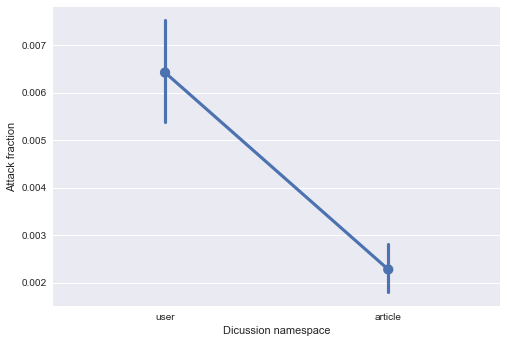

In [20]:
# plot prevalence per ns

sns.pointplot(data = corpus, x = 'ns', y = 'attack')
plt.ylabel("Attack fraction")
plt.xlabel("Dicussion namespace")

Attacks are far more prevalent in the user talk namespace.